In [13]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from scipy.cluster.hierarchy import linkage,dendrogram
from sklearn.cluster import AgglomerativeClustering

In [2]:
df=pd.read_csv('facebooklive.csv')
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7050 entries, 0 to 7049
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   status_id         7050 non-null   int64  
 1   status_type       7050 non-null   object 
 2   status_published  7050 non-null   object 
 3   num_reactions     7050 non-null   int64  
 4   num_comments      7050 non-null   int64  
 5   num_shares        7050 non-null   int64  
 6   num_likes         7050 non-null   int64  
 7   num_loves         7050 non-null   int64  
 8   num_wows          7050 non-null   int64  
 9   num_hahas         7050 non-null   int64  
 10  num_sads          7050 non-null   int64  
 11  num_angrys        7050 non-null   int64  
 12  Column1           0 non-null      float64
 13  Column2           0 non-null      float64
 14  Column3           0 non-null      float64
 15  Column4           0 non-null      float64
dtypes: float64(4), int64(10), object(2)
memory

In [3]:
#X=df[['num_reactions','num_comments','num_shares','num_likes','num_loves']]
X=df[['num_shares','num_loves']]
S=StandardScaler()
X_scaled=S.fit_transform(X)

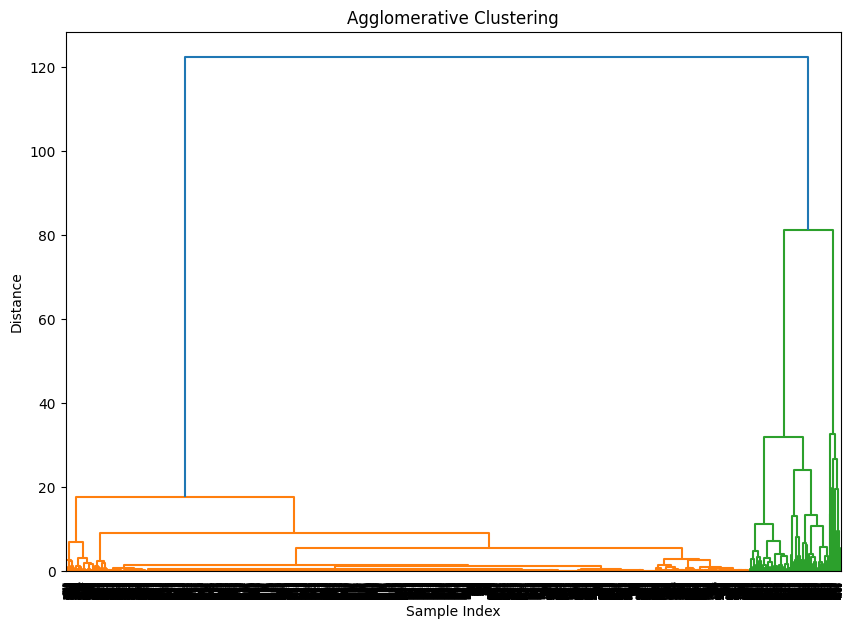

In [4]:
import sys
sys.setrecursionlimit(8000)
#Generate Linkage matrix
S=linkage(X_scaled,method='ward')
#Plot Dendrogram
plt.figure(figsize=(10,7))
dendrogram(S)#Plots dendrogram
plt.title("Agglomerative Clustering")
plt.xlabel('Sample Index')
plt.ylabel('Distance')
plt.show()

In [5]:
from sklearn.cluster import KMeans
mymodel=KMeans(n_clusters=2,random_state=42)
km=mymodel.fit(X_scaled)
print(km.cluster_centers_)
Yc=km.labels_

[[-0.1875742  -0.18562549]
 [ 3.14340336  3.11074664]]


Text(0, 0.5, 'num_loves')

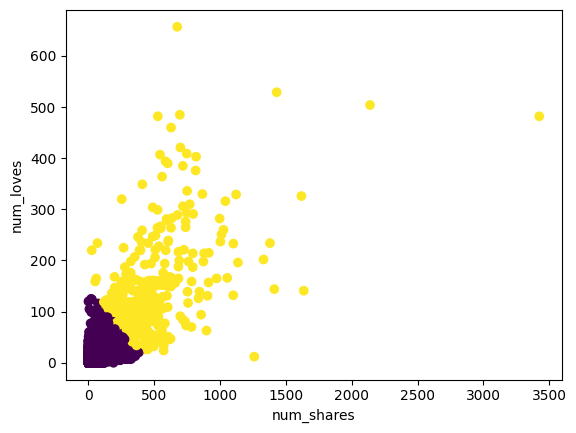

In [6]:
#Understanding Clustering Results with Plots
plt.scatter(X["num_shares"],X["num_loves"],c=Yc, cmap='viridis')
plt.xlabel("num_shares")
plt.ylabel("num_loves")

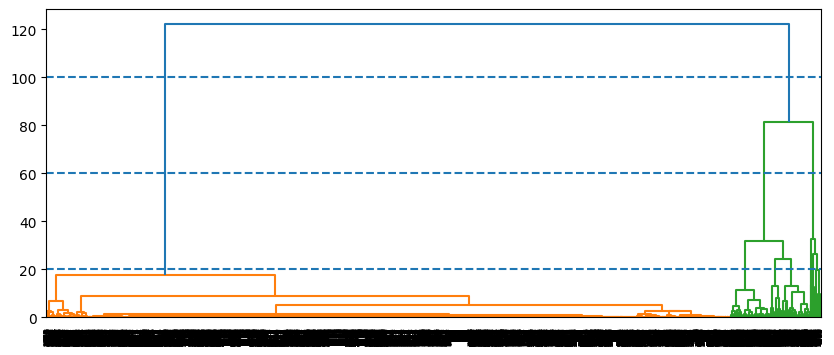

In [7]:
#Visualizing clusters at each stage
from scipy.cluster.hierarchy import fcluster
S=linkage(X_scaled,method='ward')
#print(S.shape)
#Choose heights
h=[100,60,20]
plt.figure(figsize=(10,4))
dendrogram(S)
for i in h:
    plt.axhline(y=i,linestyle="--")
plt.show()

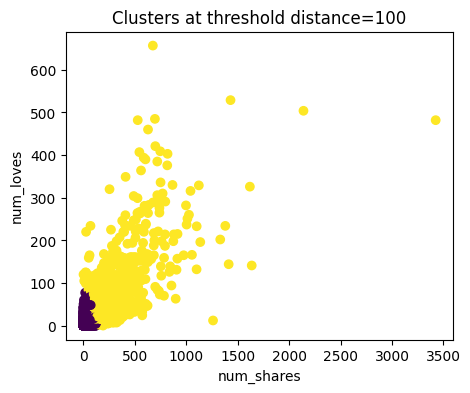

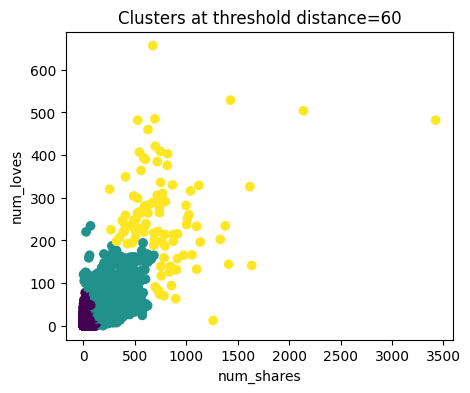

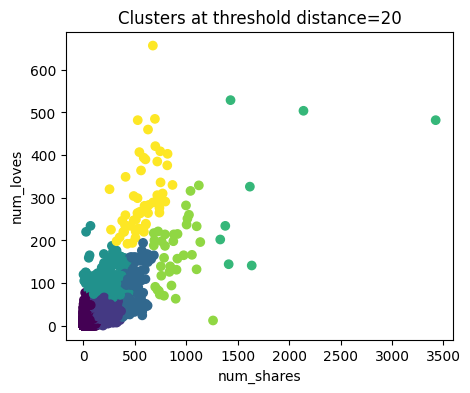

In [8]:
#Visulaize clusters at each height
for i in h:
    labels=fcluster(S,t=i,criterion='distance')
    plt.figure(figsize=(5,4))
    plt.scatter(X['num_shares'],X['num_loves'],c=labels,cmap='viridis')
    plt.title(f"Clusters at threshold distance={i}")
    plt.xlabel('num_shares')
    plt.ylabel('num_loves')
    plt.show()

In [9]:
print(S)

[[1.00000000e+00 3.00000000e+00 0.00000000e+00 2.00000000e+00]
 [2.20000000e+01 7.05000000e+03 0.00000000e+00 3.00000000e+00]
 [4.00000000e+00 2.51000000e+02 0.00000000e+00 2.00000000e+00]
 ...
 [1.40920000e+04 1.40940000e+04 3.26002403e+01 9.60000000e+01]
 [1.40950000e+04 1.40960000e+04 8.12097269e+01 8.25000000e+02]
 [1.40900000e+04 1.40970000e+04 1.22287790e+02 7.05000000e+03]]


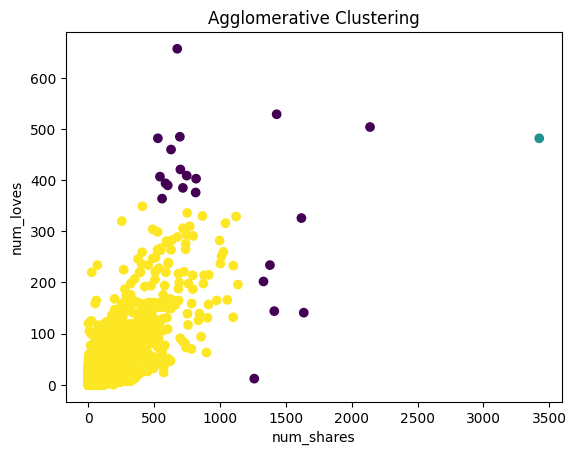

In [14]:
#Using various types of linkages and metrics
#mymod=AgglomerativeClustering(n_clusters=3,metric='euclidean',linkage='ward')
#mymod=AgglomerativeClustering(n_clusters=3,metric='euclidean',linkage='single')
#mymod=AgglomerativeClustering(n_clusters=3,metric='euclidean',linkage='complete')
#mymod=AgglomerativeClustering(n_clusters=3,metric='euclidean',linkage='average')
mymod=AgglomerativeClustering(n_clusters=3,metric='manhattan',linkage='average')
#mymod.fit(X_scaled)
labels=mymod.fit_predict(X_scaled)
#print(labels)
plt.scatter(X['num_shares'],X['num_loves'],c=labels,cmap='viridis')
plt.title('Agglomerative Clustering')
plt.xlabel('num_shares')
plt.ylabel('num_loves')
plt.show()

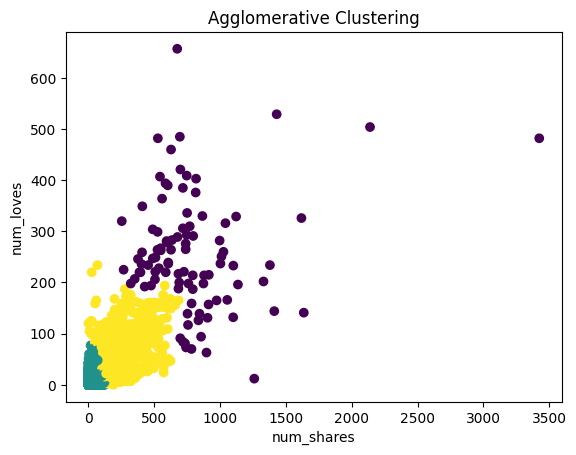

In [15]:
mymod=AgglomerativeClustering(n_clusters=3,metric='euclidean',linkage='ward')
labels=mymod.fit_predict(X_scaled)
#print(labels)
plt.scatter(X['num_shares'],X['num_loves'],c=labels,cmap='viridis')
plt.title('Agglomerative Clustering')
plt.xlabel('num_shares')
plt.ylabel('num_loves')
plt.show()

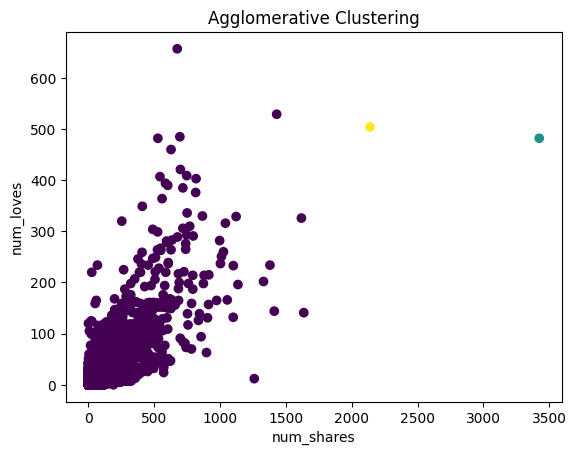

In [16]:
mymod=AgglomerativeClustering(n_clusters=3,metric='euclidean',linkage='single')
labels=mymod.fit_predict(X_scaled)
#print(labels)
plt.scatter(X['num_shares'],X['num_loves'],c=labels,cmap='viridis')
plt.title('Agglomerative Clustering')
plt.xlabel('num_shares')
plt.ylabel('num_loves')
plt.show()

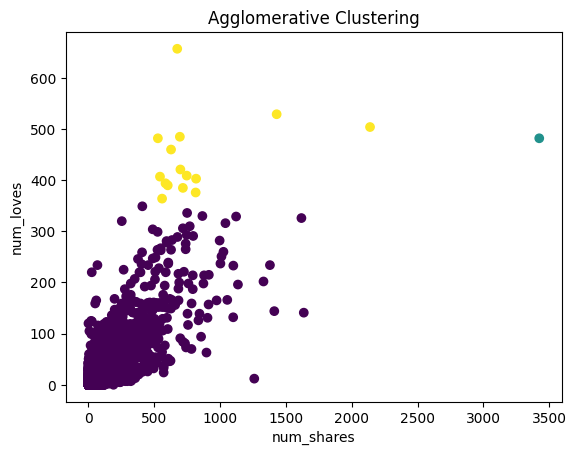

In [17]:
mymod=AgglomerativeClustering(n_clusters=3,metric='euclidean',linkage='complete')
labels=mymod.fit_predict(X_scaled)
#print(labels)
plt.scatter(X['num_shares'],X['num_loves'],c=labels,cmap='viridis')
plt.title('Agglomerative Clustering')
plt.xlabel('num_shares')
plt.ylabel('num_loves')
plt.show()

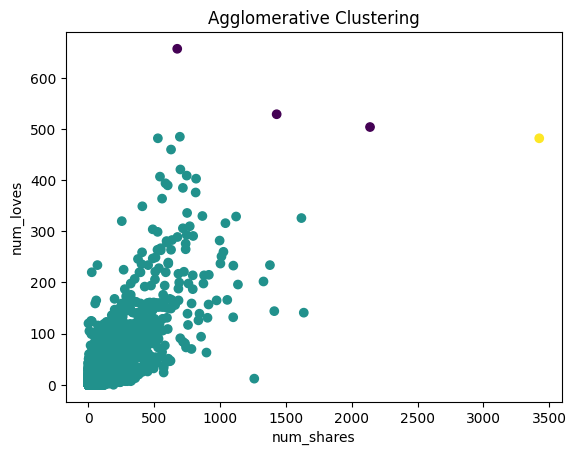

In [18]:
mymod=AgglomerativeClustering(n_clusters=3,metric='euclidean',linkage='average')
labels=mymod.fit_predict(X_scaled)
#print(labels)
plt.scatter(X['num_shares'],X['num_loves'],c=labels,cmap='viridis')
plt.title('Agglomerative Clustering')
plt.xlabel('num_shares')
plt.ylabel('num_loves')
plt.show()